In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation

In [2]:
#Importing the data
df_filtered = pd.read_csv('Resources\commodity_prices_clean.csv')
df_filtered.head()

,Date,Wheat,Gold,Rice,Tea,Coffee
0,1960-01-01,59.89,35.27,104.45,1.03,0.94
1,1960-02-01,60.99,35.27,103.54,1.03,0.95
2,1960-03-01,61.73,35.27,103.79,1.03,0.93
3,1960-04-01,60.99,35.27,100.97,1.03,0.93
4,1960-05-01,57.69,35.27,102.15,1.03,0.92


In [3]:

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Wheat'] = df_filtered['Wheat'].apply(float)
df_filtered['Gold'] = df_filtered['Gold'].apply(float)
df_filtered['Rice'] = df_filtered['Rice'].apply(float)

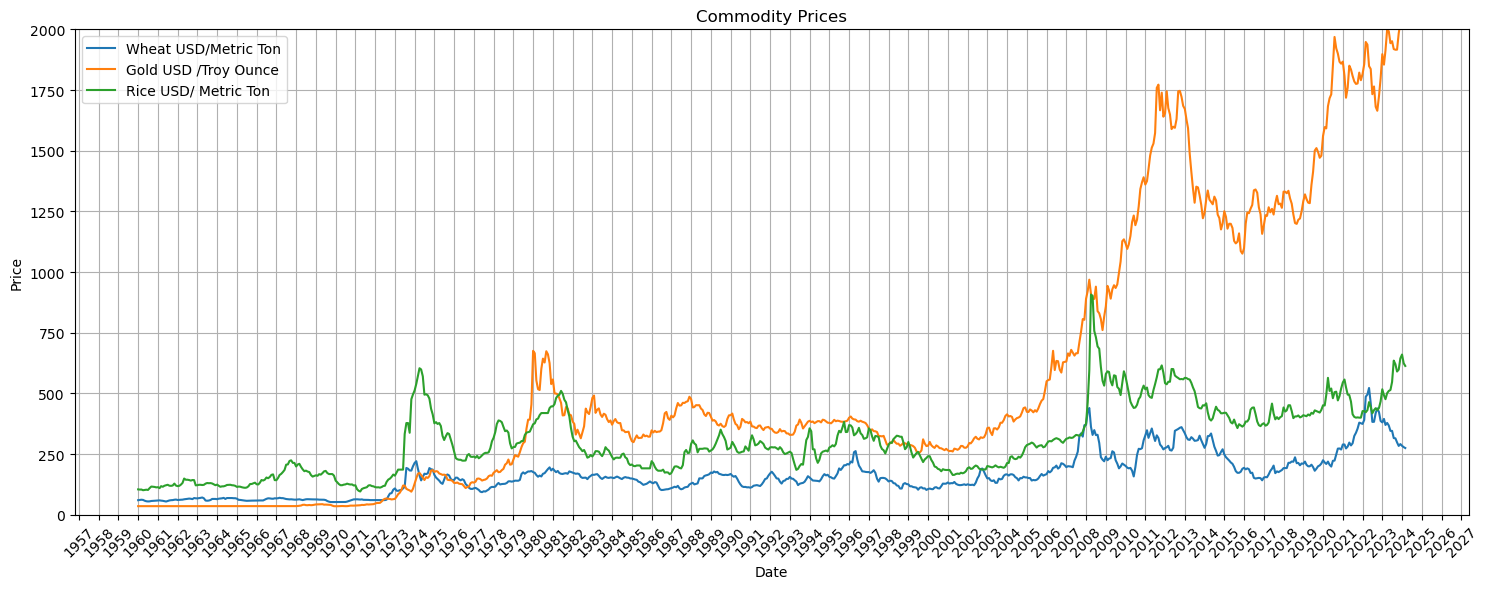

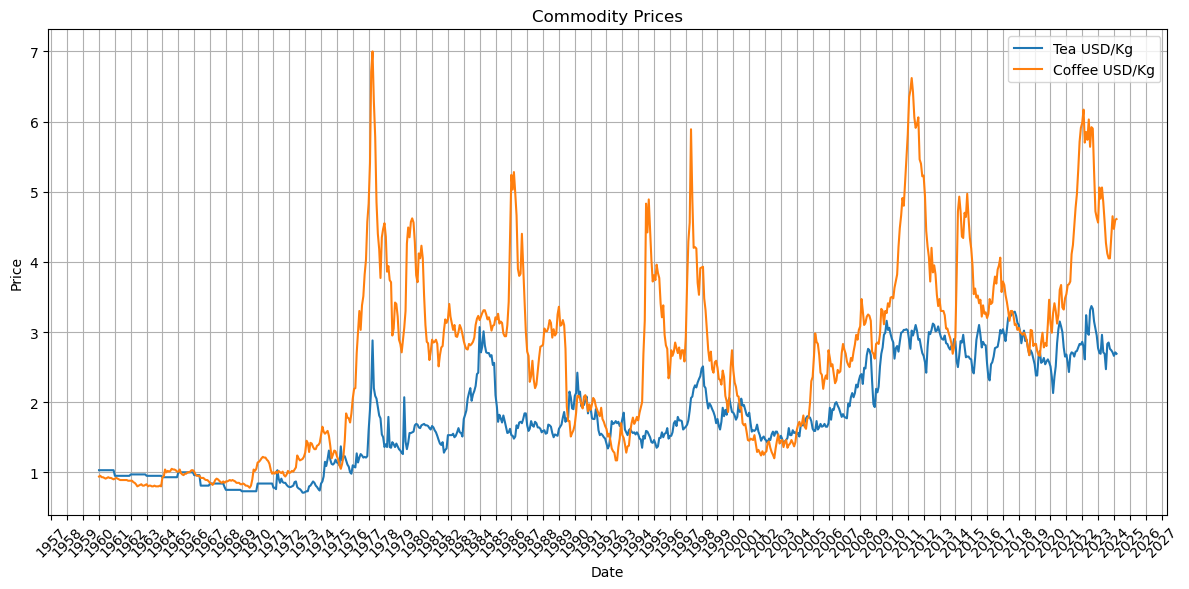

In [4]:
# Increase figure size
plt.figure(figsize=(15, 6))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat'], label='Wheat USD/Metric Ton', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold USD /Troy Ounce', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice'], label='Rice USD/ Metric Ton', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# Now set the y-axis limits after creating the lines
plt.ylim(0, 2000)  # Set y-axis range to (2000)

#df_filtered["Tea, avg 3 auctions"] = df_filtered["Tea, avg 3 auctions"].apply(float)
df_filtered["Coffee"] = df_filtered["Coffee"].apply(float)
# Increase figure size
plt.figure(figsize=(12, 6))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered["Tea"], label='Tea USD/Kg', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered["Coffee"], label="Coffee USD/Kg", linestyle='-')  # Store lines for later use


plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements

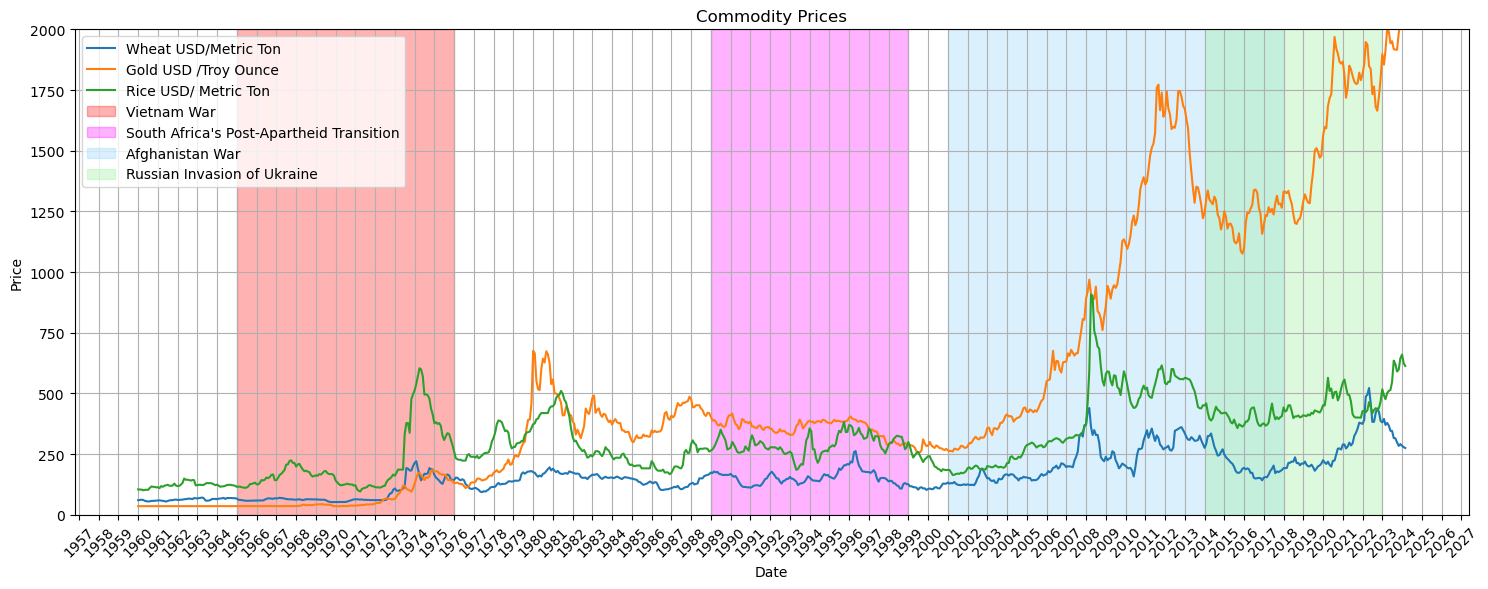

In [36]:
#Create a colormap for the Tea and Coffee production with the years of: Vietnam War (1965-1975), South Africa's Post-Apartheid Transition (1989-1998) Afghanistan war (2001-2017) and Russian invasion of Ukraine (2014 - 2022)
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

plt.figure(figsize=(15, 6))

# Plot lines
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat'], label='Wheat USD/Metric Ton', linestyle='-')
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold USD /Troy Ounce', linestyle='-')
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice'], label='Rice USD/ Metric Ton', linestyle='-')

# Add background colors for specific time periods
time_periods = [
    {'start': '1965-01-01', 'end': '1975-12-31', 'color': 'red', 'label': 'Vietnam War'},
    {'start': '1989-01-01', 'end': '1998-12-31', 'color': 'magenta', 'label': "South Africa's Post-Apartheid Transition"},
    {'start': '2001-01-01', 'end': '2017-12-31', 'color': 'lightskyblue', 'label': 'Afghanistan War'},
    {'start': '2014-01-01', 'end': '2022-12-31', 'color': 'lightgreen', 'label': 'Russian Invasion of Ukraine'}
]

for period in time_periods:
    plt.axvspan(pd.to_datetime(period['start']), pd.to_datetime(period['end']), color=period['color'], alpha=0.3, label=period['label'])

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Set y-axis limits
plt.ylim(0, 2000)

plt.show()


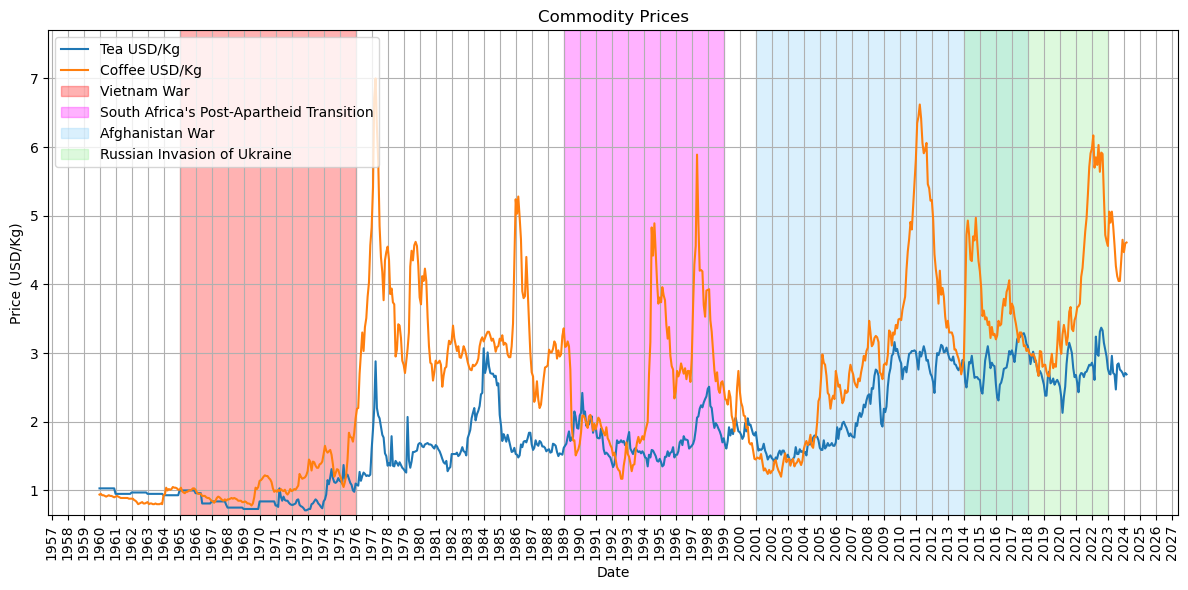

In [45]:
plt.figure(figsize=(12, 6))

# Plot lines
lines1 = plt.plot(df_filtered['Date'], df_filtered['Tea'], label='Tea USD/Kg', linestyle='-')
lines2 = plt.plot(df_filtered['Date'], df_filtered['Coffee'], label='Coffee USD/Kg', linestyle='-')

# Add background colors for specific time periods
time_periods = [
    {'start': '1965-01-01', 'end': '1975-12-31', 'color': 'red', 'label': 'Vietnam War'},
    {'start': '1989-01-01', 'end': '1998-12-31', 'color': 'magenta', 'label': "South Africa's Post-Apartheid Transition"},
    {'start': '2001-01-01', 'end': '2017-12-31', 'color': 'lightskyblue', 'label': 'Afghanistan War'},
    {'start': '2014-01-01', 'end': '2022-12-31', 'color': 'lightgreen', 'label': 'Russian Invasion of Ukraine'}
]

for period in time_periods:
    plt.axvspan(pd.to_datetime(period['start']), pd.to_datetime(period['end']), color=period['color'], alpha=0.3, label=period['label'])

plt.xlabel('Date')
plt.ylabel('Price (USD/Kg)')  # Assuming the values represent price
plt.title('Commodity Prices')

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust spacing to prevent overlapping elements
plt.tight_layout()

# Adjust y-axis limits based on the data range
min_price = min(df_filtered['Tea'].min(), df_filtered['Coffee'].min())
max_price = max(df_filtered['Tea'].max(), df_filtered['Coffee'].max())
plt.ylim(min_price * 0.9, max_price * 1.1)  # Adding some padding

plt.show()
